# Problem Statement

#### About the dataset

- Age : Describes age of the individuals, continuous
- Workclass : 

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Check if null values are present

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# check if duplicate values are present
df.duplicated().sum()

24

In [8]:
# let's drop the duplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# select categorical and numerical features separately
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(exclude='object').columns

In [11]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [12]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [13]:
df['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
# fetch the unique value from categorical data
for i in categorical_features:
    print(i, df[i].unique(),'\n')


workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife'] 

race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex ['Female' 'Male'] 

native.country ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trin

In [15]:
# remove ? and replace with mode value
df['workclass'] = df['workclass'].replace('?', df['workclass'].mode()[0])
df['occupation'] = df['occupation'].replace('?', df['occupation'].mode()[0])
df['native.country'] = df['native.country'].replace('?', df['native.country'].mode()[0])

## Data Visualization

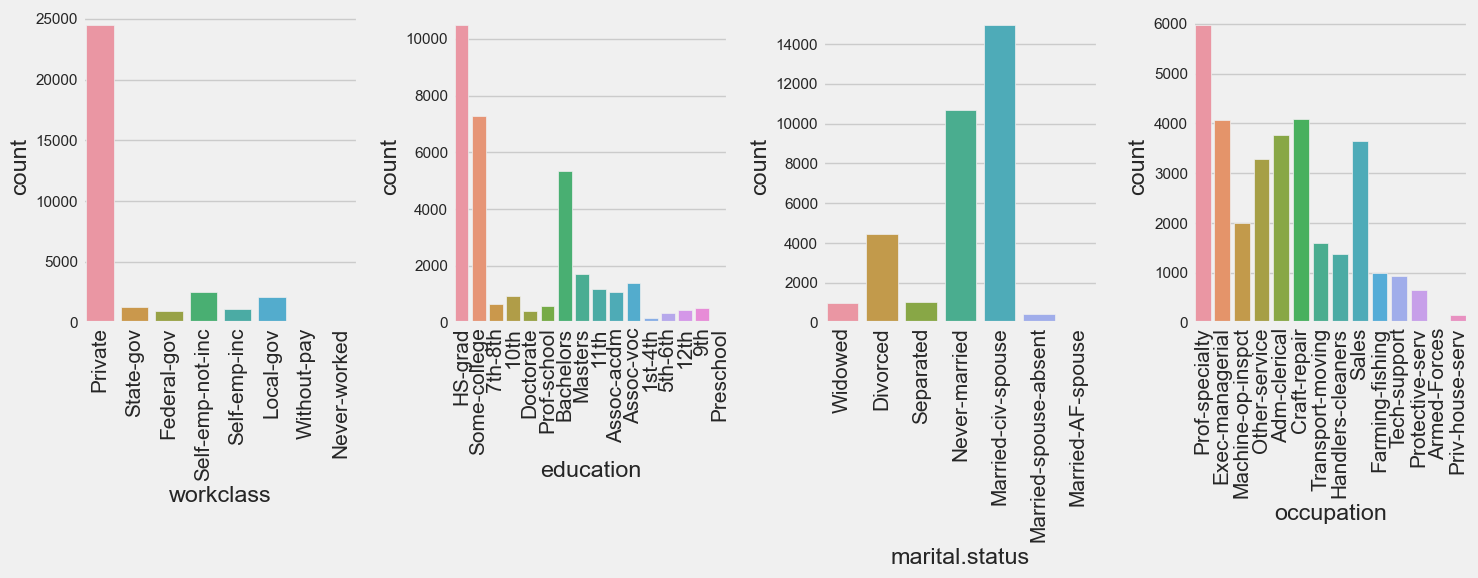

In [16]:
plt.style.use('fivethirtyeight')

columns1 = ['workclass', 'education', 'marital.status', 'occupation']

for i in range(0, len(columns1)):
    plt.subplot(1,4,i+1)
    sns.countplot(x=df[columns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

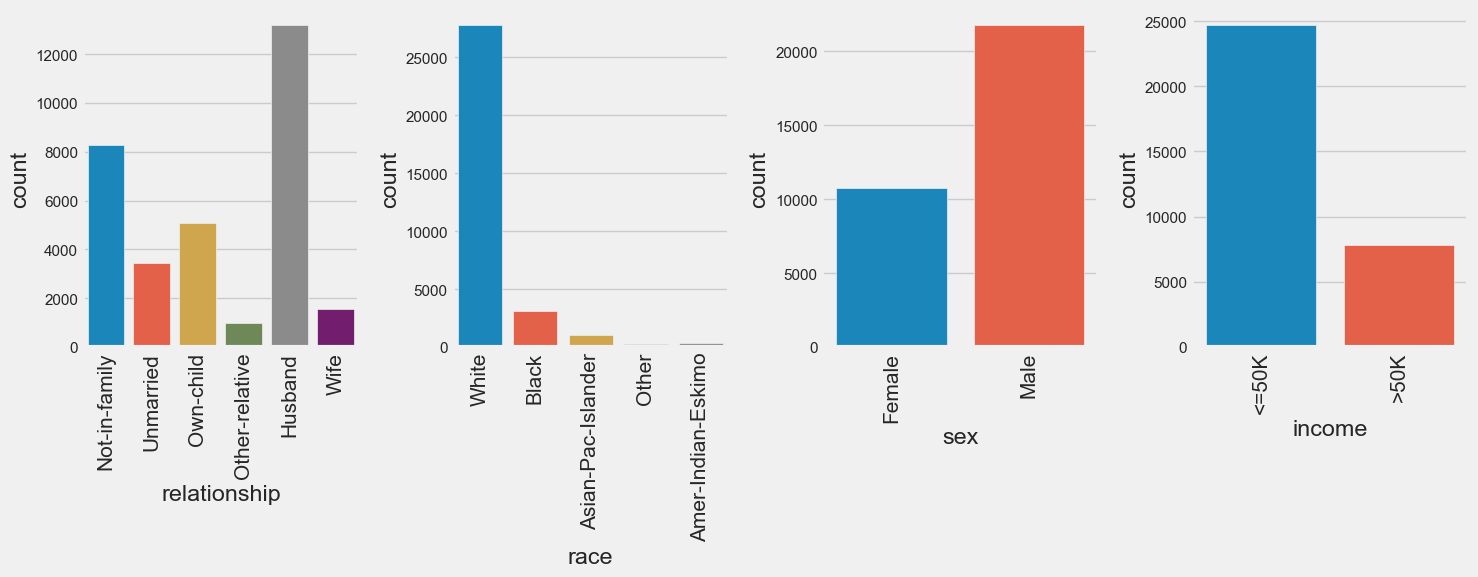

In [17]:
columns2 = ['relationship','race','sex','income']

for i in range(0, len(columns2)):
    plt.subplot(1,4,i+1)
    sns.countplot(x=df[columns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


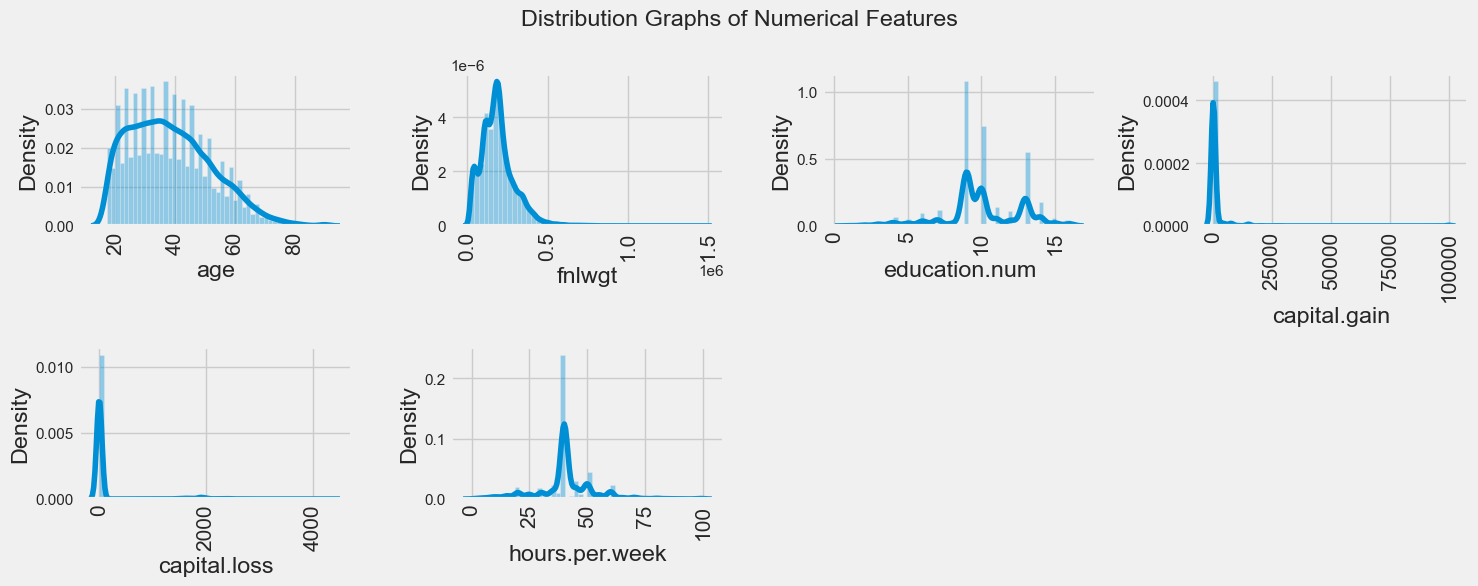

In [18]:
plt.suptitle("Distribution Graphs of Numerical Features")
for i in range(len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

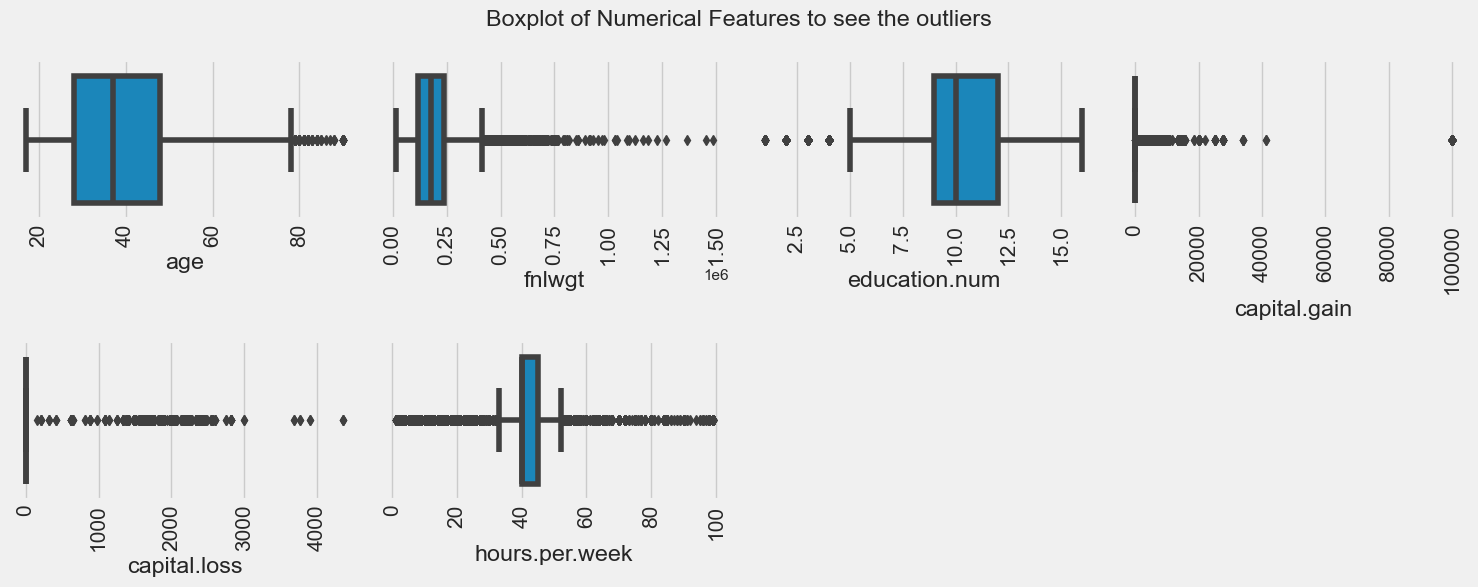

In [19]:
plt.suptitle("Boxplot of Numerical Features to see the outliers")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

<Axes: xlabel='income'>

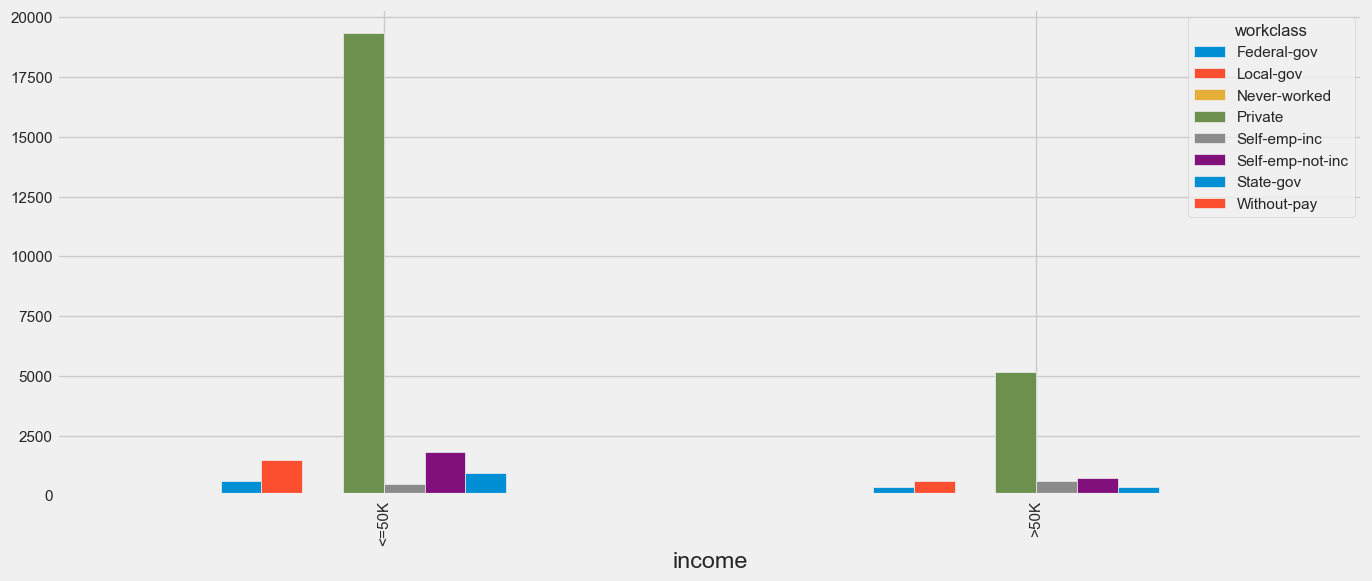

In [20]:
salary = pd.crosstab(df['income'],df['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

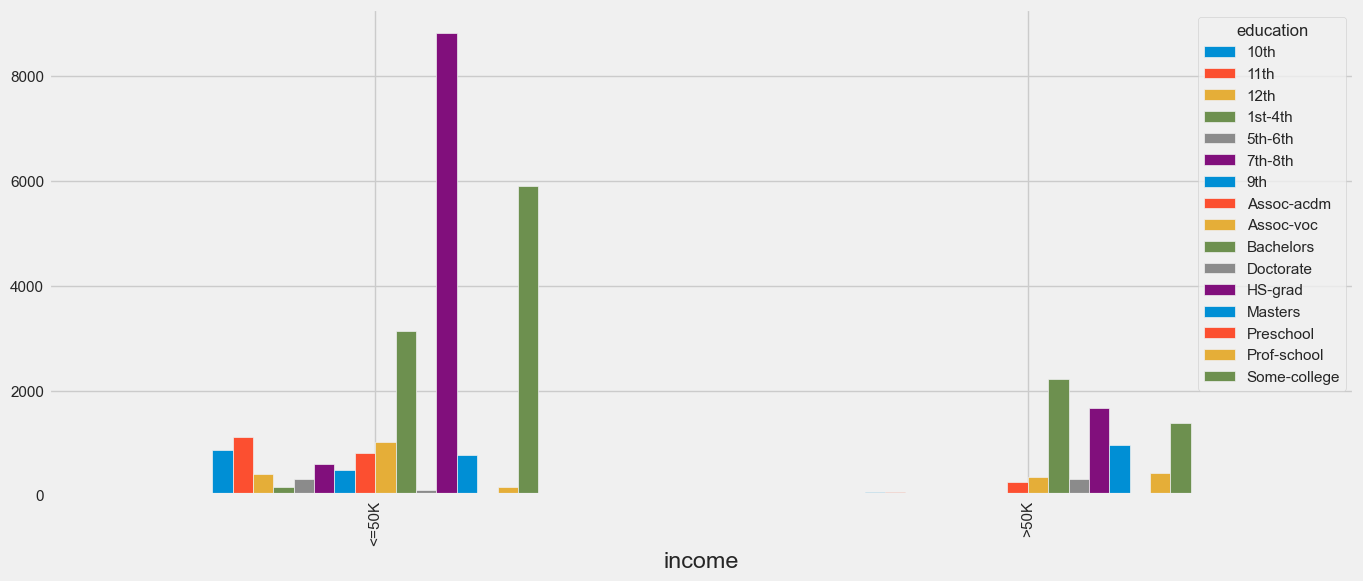

In [21]:
education = pd.crosstab(df['income'],df['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

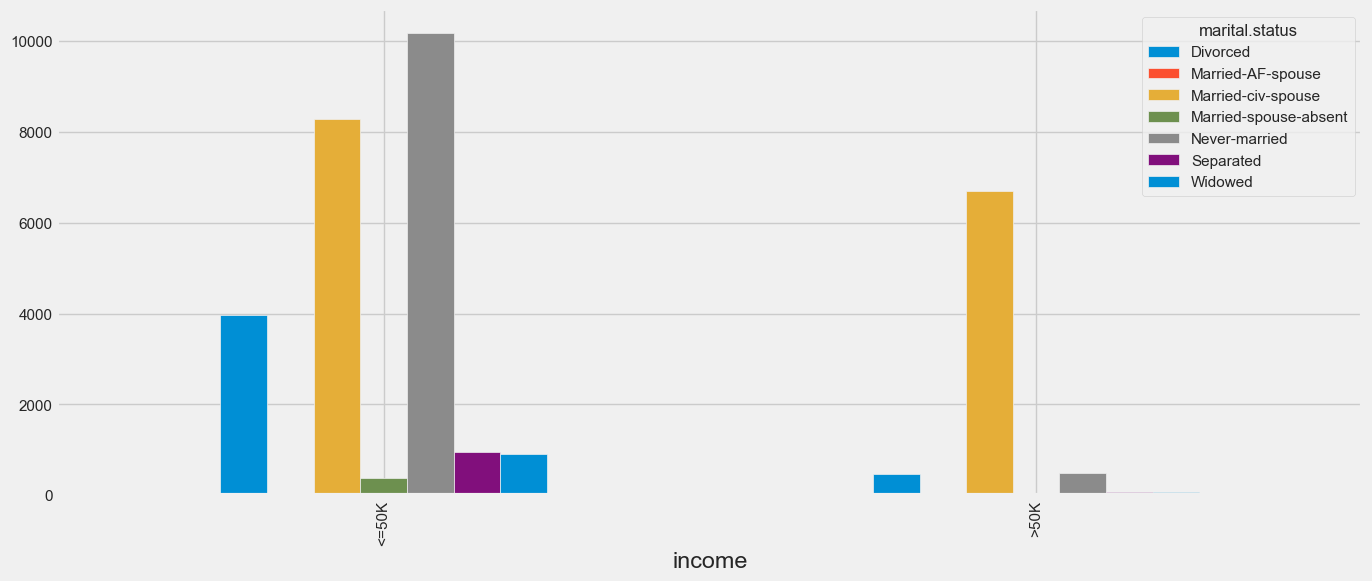

In [22]:
marital_status = pd.crosstab(df['income'],df['marital.status'])
marital_status.plot(kind='bar')

<Axes: xlabel='income'>

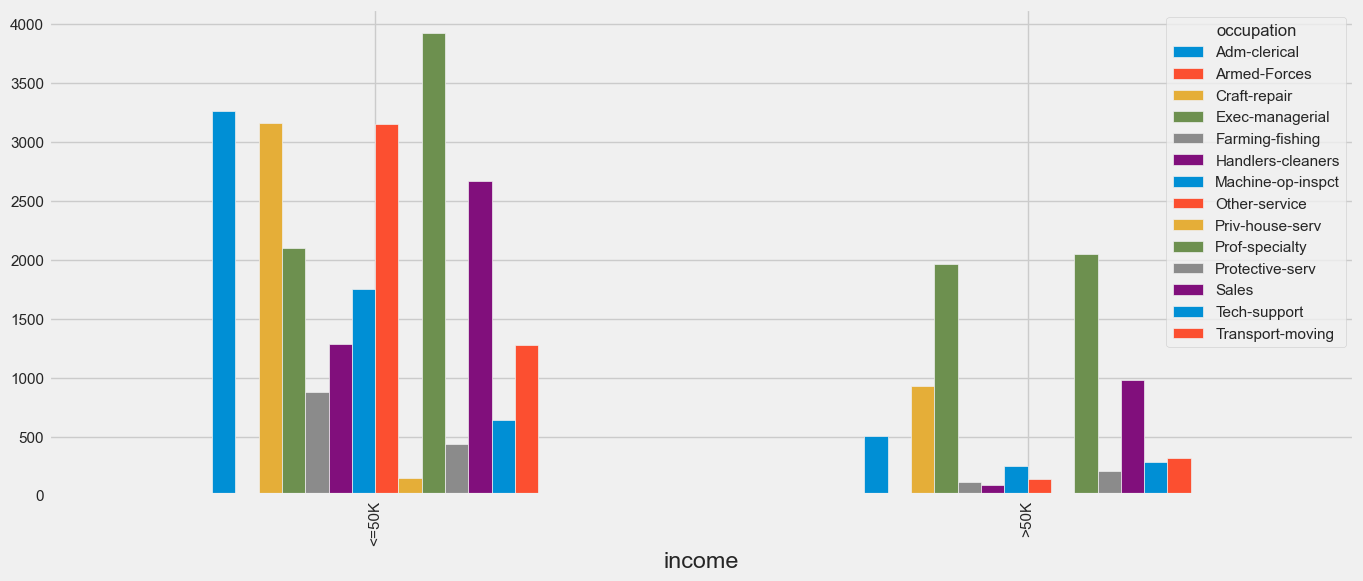

In [23]:
occupation = pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind='bar')

<Axes: xlabel='income'>

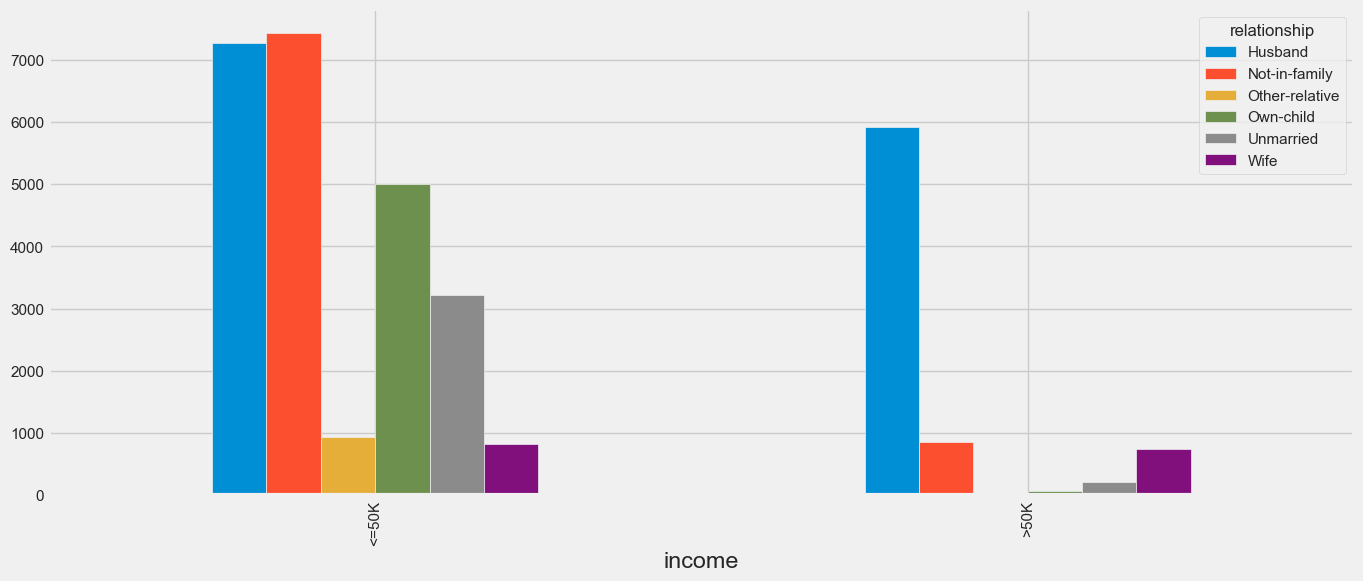

In [24]:
relationship = pd.crosstab(df['income'],df['relationship'])
relationship.plot(kind='bar')

<Axes: xlabel='income'>

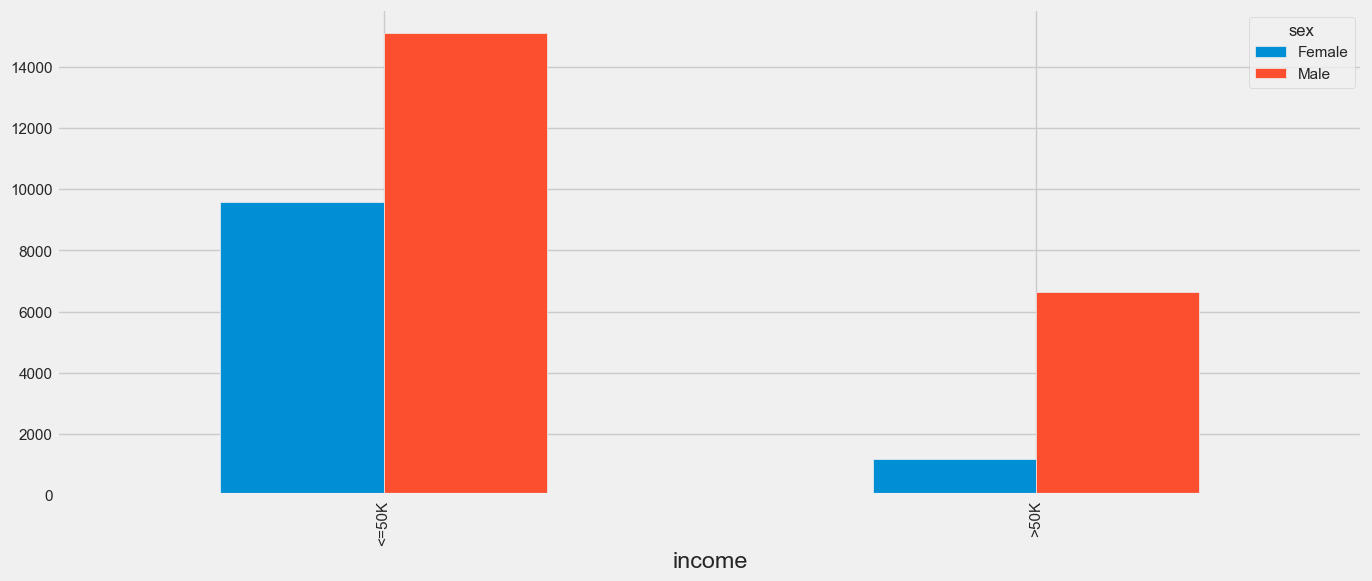

In [25]:
sex = pd.crosstab(df['income'],df['sex'])
sex.plot(kind='bar')

In [26]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in categorical_features:
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

In [28]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<Axes: >

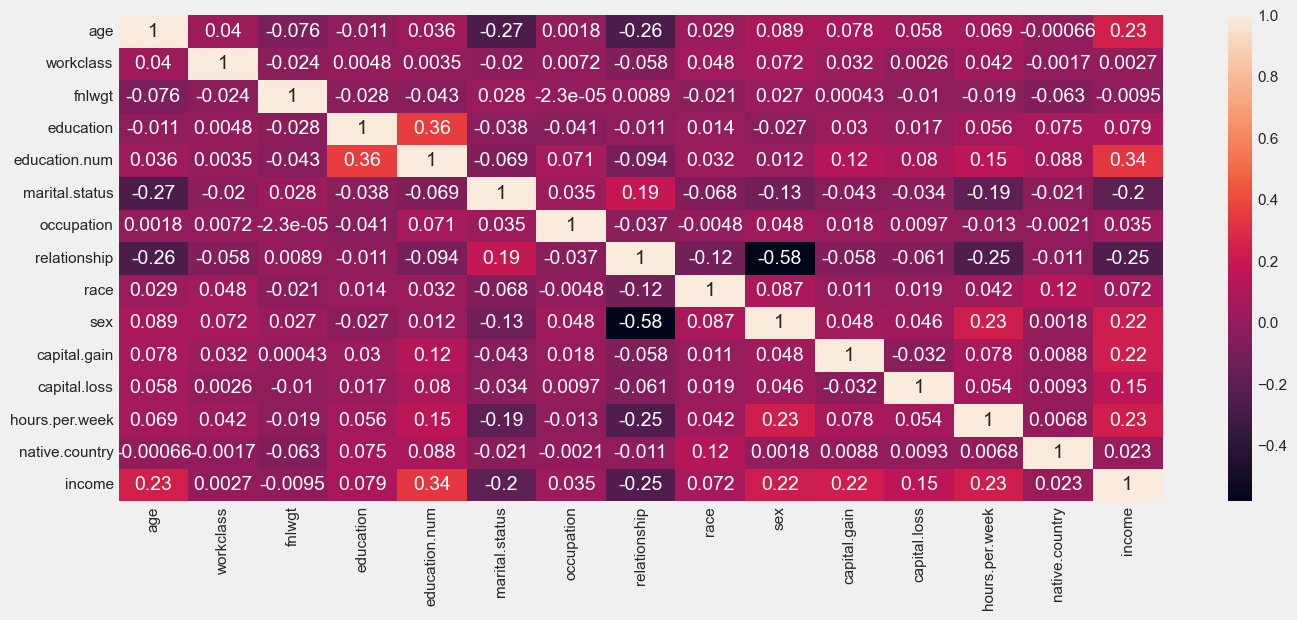

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [31]:
df.drop(['education','fnlwgt','native.country'],axis=1,inplace=True)

In [32]:
df.sample(5)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
478,40,3,16,2,9,5,4,0,0,1977,20,1
12893,39,3,14,4,11,1,1,1,0,0,40,0
26362,54,1,14,0,9,1,4,0,0,0,40,0
25496,29,3,13,2,3,0,4,1,0,0,45,1
17000,30,3,13,2,9,0,4,1,0,0,40,1
